In [1]:
import csky as cy
import numpy as np
import pickle as pkl
import histlite as hl
import matplotlib.pyplot as plt
import glob as glob
import pandas as pd

# csky with Queso and Greco
Steps we need to do for QUESO:
1) Produce a QUESO signal file
2) Produce a QUESO fake GRL
3) Produce a QUESO fake data


# Dataset ****28

## 1. Produce a QUESO signal file
- concatenate all QUESO genie and muongun files we use
- we can include muongun to the signal because ow = 0, that means it will never contribute to the signal)

In [2]:
file_path = "/data/user/bschlueter/software/nusources_dataset_converters/data/"

muongun = np.load(file_path+"muongun_131028_interaction.npy")
queso_e = np.load(file_path+"queso_120028.npy")
queso_ebar = np.load(file_path+"queso_121028.npy")
queso_mu = np.load(file_path+"queso_140028.npy")
queso_mubar = np.load(file_path+"queso_141028.npy")
queso_tau = np.load(file_path+"queso_160028.npy")
queso_taubar = np.load(file_path+"queso_161028.npy")

all_files = np.concatenate([queso_e,queso_ebar,queso_mu,queso_mubar,queso_tau, queso_taubar, muongun])

del muongun, queso_e, queso_ebar, queso_mu, queso_mubar, queso_tau, queso_taubar

#np.save(file_path+"QUESO_MC_all_combined_with_muongun_2.npy", all_files)

## 2. Produce fake data


In [3]:
livetime = 3*365*24*60*60
print(max(all_files['atmo_weight'] * livetime))
n = np.random.poisson(all_files['atmo_weight'] * livetime)
sampled = np.random.choice(all_files, size=n.sum(), p=n/n.sum())

print("Sampled events: \t", len(sampled))
print("Expected events: \t", sum(all_files['atmo_weight'] * livetime))

#np.save(file_path+"Queso_Fakedata_3Years_2.npy",sampled)

3128.63743592075
Sampled events: 	 673548
Expected events: 	 673839.8116439681


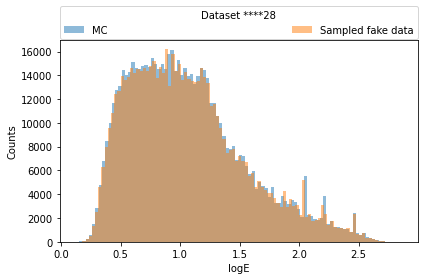

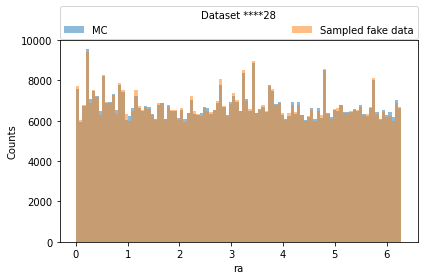

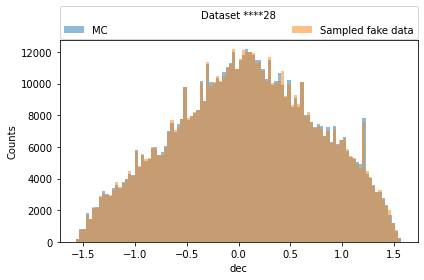

In [6]:
# plot histograms for comparison between MC and sampled fake data

keys = ['logE', 'ra', 'dec']
for key in keys:
    plt.figure()
    plt.hist(all_files[key]  , weights=all_files['atmo_weight']*livetime,bins=100,color='C0',label='MC',alpha=0.5)
    plt.hist(sampled[key],bins=100,color='C1',label='Sampled fake data',alpha=0.5)
    plt.xlabel(key)
    plt.ylabel("Counts")
    plt.legend(title="Dataset ****28",bbox_to_anchor=(0,1.001,1,0.2), loc="lower left",mode="expand", borderaxespad=0, ncol=3)
    plt.tight_layout()
    plt.savefig(str(key)+"set28.png")

## 3. Produce a QUESO fake GRL
- the run duration of the GRL should be the same as the duration of our data set

In [7]:
file_path = "/data/user/bschlueter/software/nusources_dataset_converters/data/"
current_mjd = 60369
runstart = 135328
livetime = 3*365*24*60*60

dtype = [('run', int), ('start', np.float64), ('stop', np.float64), ('livetime', np.float64), ('events', int)]
grl = np.empty(1, dtype=dtype)
grl['run'] = runstart
grl['start'] = current_mjd
grl['stop'] = current_mjd + livetime/(24*3600)
grl['livetime'] = livetime/(24*3600)
grl['events'] = len(sampled)

np.save(file_path+"QUESO_fake_GRL_2.npy",grl)

In [8]:
print((grl['events']))

[673315]


# Dataset ****29

In [111]:
import numpy.lib.recfunctions as rfn
file_path = "/data/user/bschlueter/software/nusources_dataset_converters/data/"

muongun = np.load("/data/user/bschlueter/software/nusources_dataset_converters/muongun_131029_new.npy")
queso_e = np.load(file_path+"queso_120029.npy")
queso_ebar = np.load(file_path+"queso_121029.npy")
queso_mu = np.load(file_path+"queso_140029.npy")
queso_mubar = np.load(file_path+"queso_141029.npy")
queso_tau = np.load(file_path+"queso_160029.npy")
queso_taubar = np.load(file_path+"queso_161029.npy")

all_files = np.concatenate([queso_e, queso_ebar, queso_mu, queso_mubar, queso_tau, queso_taubar, muongun])
del muongun, queso_e, queso_ebar, queso_mu, queso_mubar, queso_tau, queso_taubar

#np.save(file_path+"QUESO_MC_all_combined_29.npy", all_files)

0.8154593093322001
1.4467103878164513
0.5673236092429648
3.015459611810315
1.306884879279168
0.22152021917023218
0.08075595286655446


In [33]:
file_path = "/data/user/bschlueter/software/nusources_dataset_converters/data/"
current_mjd = 60369
runstart = 135328
livetime = 3*365*24*60*60

dtype = [('run', int), ('start', np.float64), ('stop', np.float64), ('livetime', np.float64), ('events', int)]
grl = np.empty(1, dtype=dtype)
grl['run'] = runstart
grl['start'] = current_mjd
grl['stop'] = current_mjd + livetime/(24*3600)
grl['livetime'] = livetime/(24*3600)
grl['events'] = len(sampled)

np.save(file_path+"QUESO_fake_GRL_3Year_29.npy",grl)

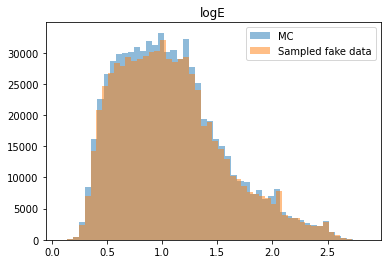

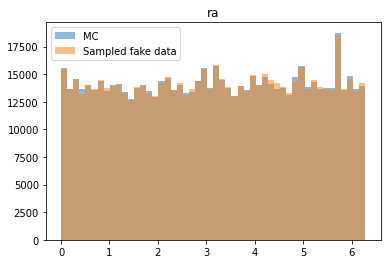

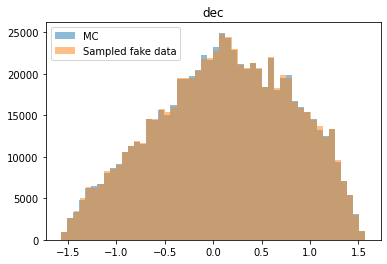

In [34]:
keys = ['logE', 'ra', 'dec']
for key in keys:
    plt.figure()
    plt.title(key)
    plt.hist(all_files[key]  ,bins=50, weights=all_files['atmo_weight']*livetime,color='C0',label='MC',alpha=0.5)
    plt.hist(sampled[key],bins=50,color='C1',label='Sampled fake data',alpha=0.5)
    plt.legend()
    

In [ ]:
livetime =3*365*24*60*60
print(max(all_files['atmo_weight']), livetime)
n = np.random.poisson(all_files['atmo_weight'] * livetime)
sampled = np.random.choice(all_files, size=n.sum(), p=n/n.sum())

print("Sampled events: \t", len(sampled))
print("Expected events: \t", sum(all_files['atmo_weight'] * livetime))

np.save(file_path+"Queso_Fakedata_3Years_29.npy",sampled)

# Compare dataset ****28 and ****29

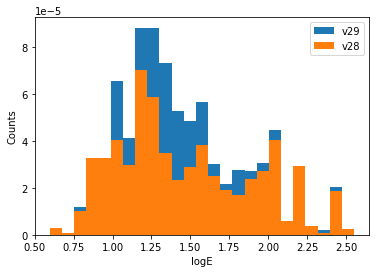

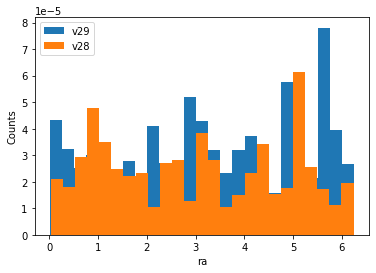

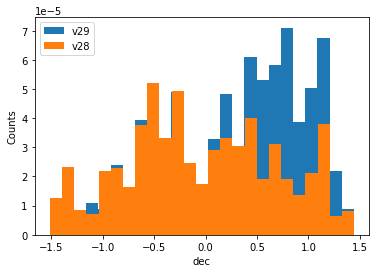

In [109]:
plt.figure()
plt.hist(mtest['logE'],bins=25,weights= mtest['atmo_weight'],label="v29")
plt.hist(muongun['logE'],bins=25,weights= muongun['atmo_weight'],label="v28")
plt.xlabel("logE")
plt.ylabel("Counts")
plt.legend()
plt.figure()
plt.hist(mtest['ra'],bins=25,weights= mtest['atmo_weight'],label="v29")
plt.hist(muongun['ra'],bins=25,weights= muongun['atmo_weight'],label="v28")
plt.xlabel("ra")
plt.ylabel("Counts")
plt.legend()
plt.figure()
plt.hist(mtest['dec'],bins=25,weights= mtest['atmo_weight'],label="v29")
plt.hist(muongun['dec'],bins=25,weights= muongun['atmo_weight'],label="v28")
plt.xlabel("dec")
plt.ylabel("Counts")
plt.legend()